In [1]:
import numpy as np

def generate_volterra_matrix(input_data, K, M):
    """
    根据输入数据生成 Volterra 矩阵。
    input_data: 输入数据，形状为 [Batchsize, M]。
    K: Volterra 模型的非线性阶数。
    M: 记忆深度。
    返回: Volterra 矩阵 X。
    """
    Batchsize = input_data.shape[0]
    num_features = sum([M**k for k in range(1, K + 1)])  # 计算特征数量
    X = np.zeros((Batchsize, num_features))  # 初始化 Volterra 矩阵

    # 填充 Volterra 矩阵
    feature_idx = 0
    for k in range(1, K + 1):
        for indices in np.ndindex(*(M,) * k):
            product = np.prod(input_data[:, indices], axis=1)
            X[:, feature_idx] = product
            feature_idx += 1

    return X

def train_volterra_model(input_data, output_data, K, M):
    """
    训练 Volterra 模型，使用最小二乘法求解系数。
    input_data: 输入数据，形状为 [Batchsize, M]。
    output_data: 输出数据，形状为 [Batchsize, 1]。
    K: Volterra 模型的非线性阶数。
    M: 记忆深度。
    返回: Volterra 系数 H。
    """
    X = generate_volterra_matrix(input_data, K, M)
    H = np.linalg.pinv(X) @ output_data  # 使用伪逆求解系数
    return H

def predict_volterra_model(input_data, H, K, M):
    """
    使用 Volterra 模型预测输出。
    input_data: 输入数据，形状为 [Batchsize, M]。
    H: Volterra 系数。
    K: Volterra 模型的非线性阶数。
    M: 记忆深度。
    返回: 预测的输出。
    """
    X = generate_volterra_matrix(input_data, K, M)
    return X @ H

# # 示例
# Batchsize = 100
# M = 5  # 记忆深度
# K = 3 # 非线性阶数

# # 生成随机数据作为示例
# np.random.seed(0)
# input_data = np.random.randn(Batchsize, M)
# output_data = np.random.randn(Batchsize, 1)

# # 训练 Volterra 模型
# H = train_volterra_model(input_data, output_data, K, M)

# # 使用模型进行预测
# predicted_output = predict_volterra_model(input_data, H, K, M)

# # 打印预测结果的前5个
# print(predicted_output[:5])


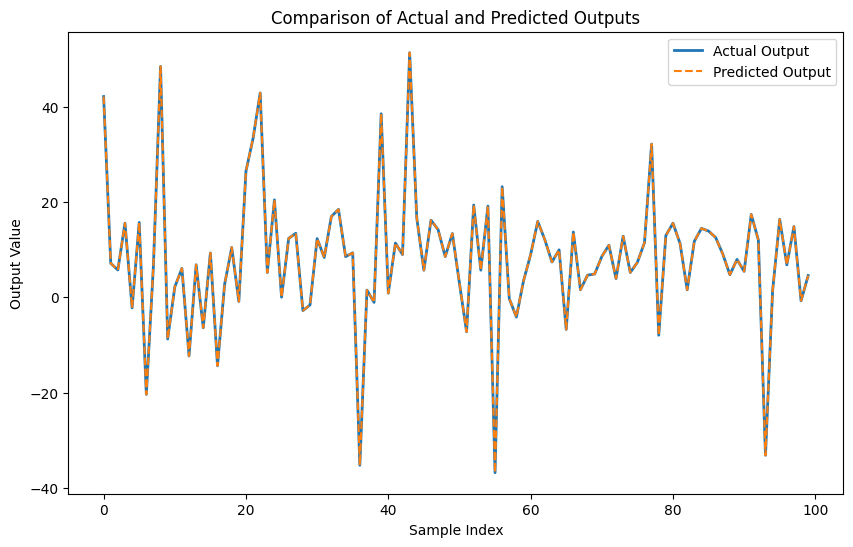

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 示例
Batchsize = 100
M = 5  # 记忆深度
K = 5  # 非线性阶数

# 生成输入数据
np.random.seed(0)
input_data = np.random.randn(Batchsize, M)

# 定义非线性函数
def nonlinear_function(x):
    return x[:, 0]**2 + 2*x[:, 1]**2 - 3*x[:, 2] + 4*x[:, 3]**3 - 5*x[:, 4] + 6

# 生成输出数据
output_data = nonlinear_function(input_data).reshape(-1, 1)

# 训练 Volterra 模型
H = train_volterra_model(input_data, output_data, K, M)

# 使用模型进行预测
predicted_output = predict_volterra_model(input_data, H, K, M)

# 绘制实际输出和预测输出的对比图
plt.figure(figsize=(10, 6))
plt.plot(output_data, label='Actual Output', linewidth=2)
plt.plot(predicted_output, label='Predicted Output', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.title('Comparison of Actual and Predicted Outputs')
plt.legend()
plt.show()


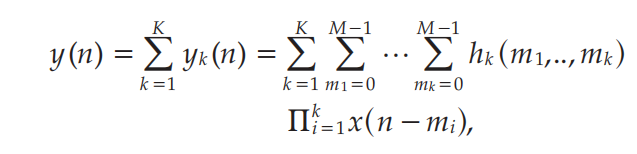

(100, 2) UUU


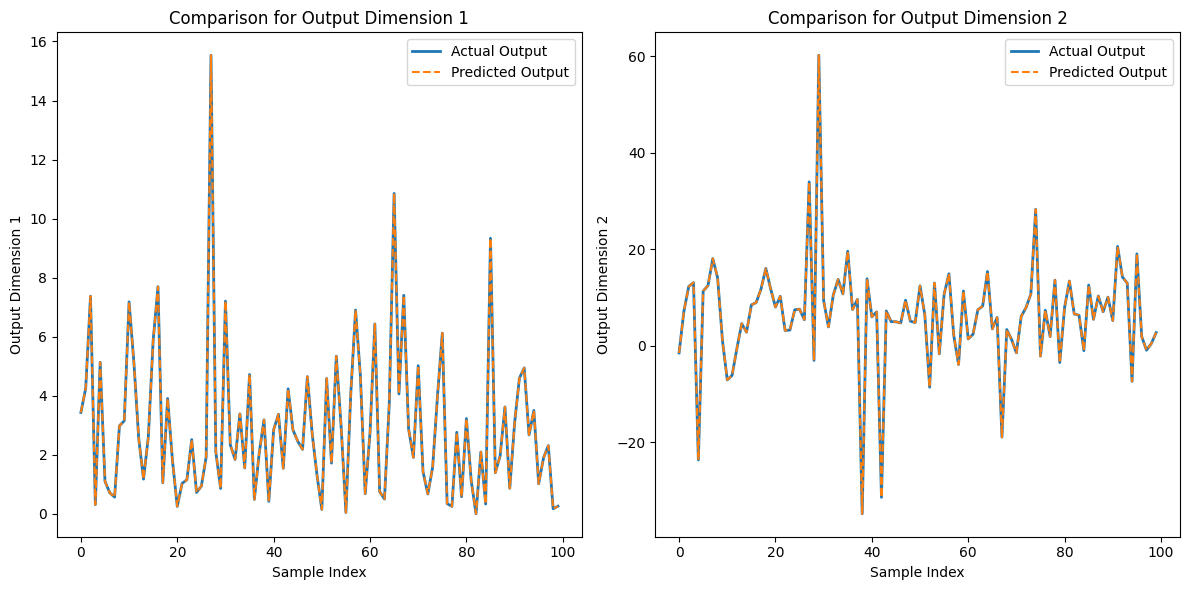

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def generate_volterra_matrix(input_data, K, M):
    Batchsize, _, num_channels = input_data.shape
    num_features = sum([M**k for k in range(1, K + 1)]) * num_channels  # 考虑通道数
    X = np.zeros((Batchsize, num_features))

    feature_idx = 0
    for channel in range(num_channels):
        for k in range(1, K + 1):
            for indices in np.ndindex(*(M,) * k):
                product = np.prod(input_data[:, indices, channel], axis=1)
                X[:, feature_idx] = product
                feature_idx += 1

    return X

def train_volterra_model(input_data, output_data, K, M):
    H_list = []
    for channel in range(output_data.shape[1]):
        X = generate_volterra_matrix(input_data, K, M)
        H = np.linalg.pinv(X) @ output_data[:, channel]
        H_list.append(H)
    return H_list

def predict_volterra_model(input_data, H_list, K, M):
    predicted_output = np.zeros((input_data.shape[0], len(H_list)))
    for channel, H in enumerate(H_list):
        X = generate_volterra_matrix(input_data, K, M)
        predicted_output[:, channel] = X @ H
    return predicted_output

# 示例
Batchsize = 100
M = 5  # 记忆深度
K = 3  # 非线性阶数

# 生成输入数据
np.random.seed(0)
input_data = np.random.randn(Batchsize, M, 2)  # 增加一个维度用于通道

# 定义非线性函数
def nonlinear_function(x):
    return np.stack([x[:, 0]**2 + 2*x[:, 1]**2, 4*x[:, 2]**3 - 5*x[:, 3] + 6], axis=1)

# 生成输出数据
output_data = nonlinear_function(input_data.reshape(Batchsize, -1))
print(output_data.shape,"UUU")
# 训练 Volterra 模型
H_list = train_volterra_model(input_data, output_data, K, M)

# 使用模型进行预测
predicted_output = predict_volterra_model(input_data, H_list, K, M)

# 绘制实际输出和预测输出的对比图
plt.figure(figsize=(12, 6))
for i in range(output_data.shape[1]):
    plt.subplot(1, output_data.shape[1], i+1)
    plt.plot(output_data[:, i], label='Actual Output', linewidth=2)
    plt.plot(predicted_output[:, i], label='Predicted Output', linestyle='--')
    plt.xlabel('Sample Index')
    plt.ylabel(f'Output Dimension {i+1}')
    plt.title(f'Comparison for Output Dimension {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()


In [4]:
# 华为数据建模

# Press Shift+F10 to execute it or replace it with your code.
# Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.
path='data.mat'
#load
from scipy import io
mat =io.loadmat(path)
print(mat.keys())
IN=np.array(mat['x'])
OUT=np.array(mat['y'])
from sklearn.preprocessing import MinMaxScaler
scal1=MinMaxScaler()
scal2=MinMaxScaler()

IN_real=[IN[i].real for i in range(len(IN))]
IN_imag=[IN[i].imag for i in range(len(IN))]
OUT_real=[OUT[i].real for i in range(len(OUT))]
OUT_imag=[OUT[i].imag for i in range(len(OUT))]

dict_keys(['__header__', '__version__', '__globals__', 'error', 'x', 'y'])


In [13]:
# 
Xin=np.concatenate((np.array(IN_real).reshape(-1,1),np.array(IN_imag).reshape(-1,1)),axis=1)
Yout=np.concatenate((np.array(OUT_real).reshape(-1,1),np.array(OUT_imag).reshape(-1,1)),axis=1)
print(Xin.shape)
print(Yout.shape)
# 保存
np.save('Xin.npy',Xin)
np.save('Yout.npy',Yout)


(245760, 2)
(245760, 2)


In [28]:
# load
Xin=np.load('Xin.npy')
Yout=np.load('Yout.npy')
# 划分训练集和测试集
Xin_train=Xin[0:int(0.8*len(Xin))]
Xin_test=Xin[int(0.8*len(Xin)):]
Yout_train=Yout[0:int(0.8*len(Yout))]
Yout_test=Yout[int(0.8*len(Yout)):]
M=5
K=3
start=0
#滑窗采样
X=[]# batch 5,2
Y=[]# batch,2
while start+M<int(len(Xin_train)):
    x=[]
    y=[]
    x.append(Xin_train[start:start+M])
    y.append(Yout_train[start+M])
    start+=1
    X.append(x)
    Y.append(y)
    
X_train=np.vstack(X)
Y_train=np.vstack(Y)
print(X_train.shape)
print(Y_train.shape)
              

(196603, 5, 2)
(196603, 2)


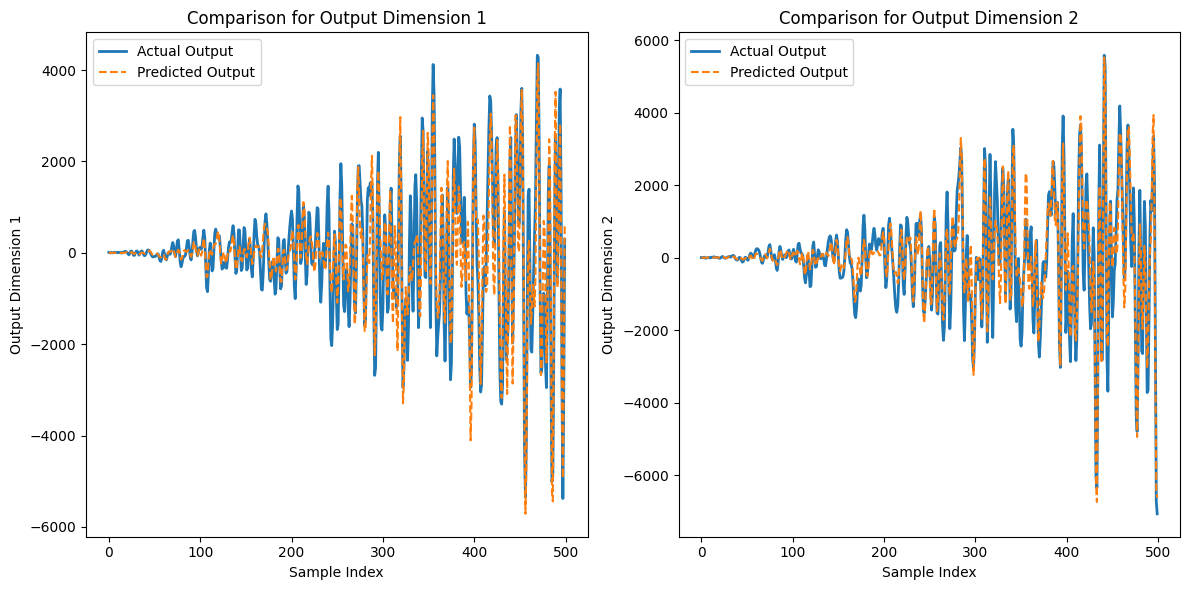

In [29]:
H_list = train_volterra_model(X_train, Y_train, K, M)

# 使用模型进行预测
predicted_output = predict_volterra_model(X_train, H_list, K, M)

# 绘制实际输出和预测输出的对比图
plt.figure(figsize=(12, 6))
for i in range(output_data.shape[1]):
    plt.subplot(1, output_data.shape[1], i+1)
    plt.plot(Y_train[:500, i], label='Actual Output', linewidth=2)
    plt.plot(predicted_output[:500, i], label='Predicted Output', linestyle='--')
    plt.xlabel('Sample Index')
    plt.ylabel(f'Output Dimension {i+1}')
    plt.title(f'Comparison for Output Dimension {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()
# 左边I 右边Q,这里计算慢是因为全部数据拿来计算了。实际上工业只需要一部分数据计算就行，系数的实时更新的




In [31]:
def nmse(target_dim1,target_dim2,estimate_dim1,estimate_dim2):
    # Denormalize the target and estimate for each dimension
    # Calculate NMSE for each dimension
    mse_dim1 = np.mean((target_dim1 - estimate_dim1) ** 2)
    mse_dim2 = np.mean((target_dim2 - estimate_dim2) ** 2)
    target_energy_dim1 = np.mean(target_dim1 ** 2)
    target_energy_dim2 = np.mean(target_dim2 ** 2)
    nmse_value_dim1 = mse_dim1 / target_energy_dim1
    nmse_value_dim2 = mse_dim2 / target_energy_dim2

    nmse_value_dim1 = 10 * np.log10(nmse_value_dim1)
    nmse_value_dim2 = 10 * np.log10(nmse_value_dim2)

    return nmse_value_dim1, nmse_value_dim2
print('nmse(dB)',nmse(Y_train[:,0],Y_train[:,1],predicted_output[:,0],predicted_output[:,1]))


nmse(dB) (-16.21039392024113, -16.18236091410543)
